<a href="https://colab.research.google.com/github/2405vaishnavi/2405vaishnavi/blob/main/Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Pandas library and aliasing it as pd.
import pandas as pd

# Importing the NumPy library and aliasing it as np.
import numpy as np

# Data Visualization libraries.
import matplotlib.pyplot as plt  # Importing the pyplot module from Matplotlib and aliasing it as plt.
import seaborn as sns  # Importing the Seaborn library for statistical data visualization and aliasing it as sns.

# Preprocessing libraries.
from sklearn.preprocessing import LabelEncoder  # Importing the LabelEncoder from the Scikit-Learn preprocessing module.
from imblearn.over_sampling import ADASYN  # Importing the ADASYN oversampling technique from the imblearn library.

# Models and related libraries.
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # Importing the RandomForestClassifier from the Scikit-Learn ensemble module.
from sklearn.model_selection import train_test_split  # Importing the train_test_split function from the Scikit-Learn model_selection module.
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score  # Importing evaluation metrics from the Scikit-Learn metrics module.

# Ignoring warnings.
import warnings  # Importing the warnings module to manage warnings.
warnings.filterwarnings("ignore")  # Filtering and ignoring warnings during execution.


In [ ]:
# Reading a CSV file into a Pandas DataFrame and assigning it to the variable air_quality_data.
data = pd.read_csv('/content/city_day.csv')

# Renaming the column 'AQI_Bucket' to 'Air_quality' in the air_quality_data DataFrame.
data.rename(columns={'AQI_Bucket': 'Air_quality'}, inplace=True)

# Displaying the first few rows of the air_quality_data DataFrame using the head() method.
data.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
data.shape

(29531, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2.5        24933 non-null  float64
 3   PM10         18391 non-null  float64
 4   NO           25949 non-null  float64
 5   NO2          25946 non-null  float64
 6   NOx          25346 non-null  float64
 7   NH3          19203 non-null  float64
 8   CO           27472 non-null  float64
 9   SO2          25677 non-null  float64
 10  O3           25509 non-null  float64
 11  Benzene      23908 non-null  float64
 12  Toluene      21490 non-null  float64
 13  Xylene       11422 non-null  float64
 14  AQI          24850 non-null  float64
 15  Air_quality  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
data.isnull().sum()

City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air_quality     4681
dtype: int64

In [ ]:
data.fillna(method='ffill',inplace=True)
data.fillna(method='bfill',inplace=True)

In [ ]:
data.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64

EDA

In [ ]:
# Showing TOP 10  cities which has higest PM2.5.
data.groupby(['City']).count()['PM2.5']

City
Ahmedabad             2009
Aizawl                 113
Amaravati              951
Amritsar              1221
Bengaluru             2009
Bhopal                 289
Brajrajnagar           938
Chandigarh             304
Chennai               2009
Coimbatore             386
Delhi                 2009
Ernakulam              162
Gurugram              1679
Guwahati               502
Hyderabad             2006
Jaipur                1114
Jorapokhar            1169
Kochi                  162
Kolkata                814
Lucknow               2009
Mumbai                2009
Patna                 1858
Shillong               310
Talcher                925
Thiruvananthapuram    1112
Visakhapatnam         1462
Name: PM2.5, dtype: int64

In [ ]:
# Obtaining the unique values in the 'PM2.5' column and returning them as an Index.
unique_pm25_values = data['PM2.5'].value_counts().index

# Creating an array 'd' containing the counts of each unique value in the 'PM2.5' column.
d = data['PM2.5'].value_counts().values

# Obtaining the unique values in the 'City' column and returning them as an Index.
unique_city_values = data['City'].value_counts().index


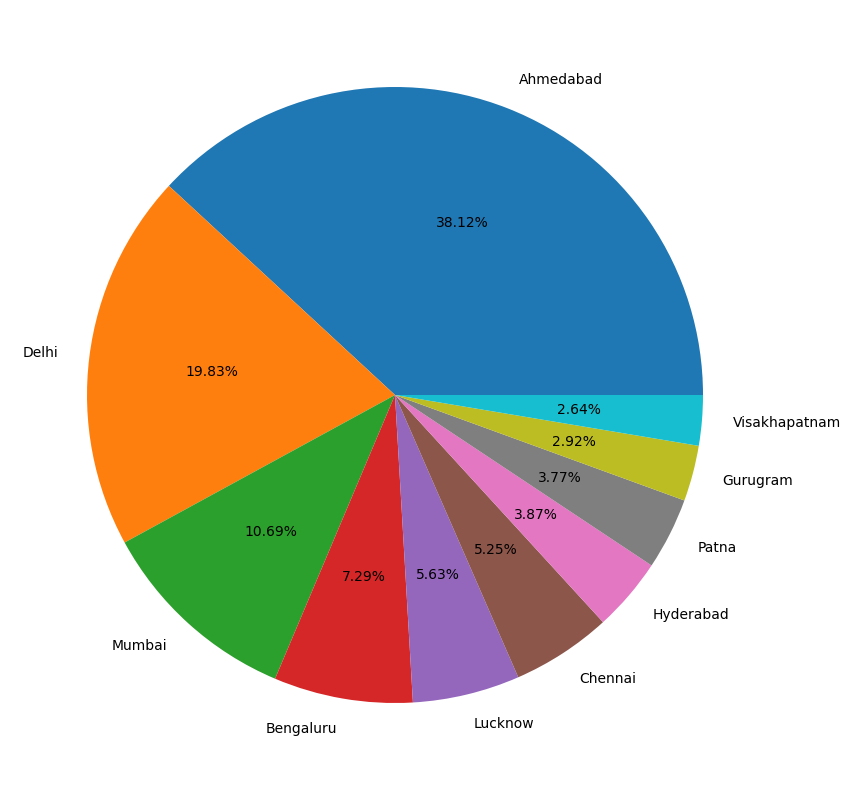

In [ ]:
# Ploting the pie chart of TOP 10 CITY which HAS MOST AMUONT OF PM2.5
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.pie(d[:10], labels = unique_city_values[:10],autopct='%1.2f%%');

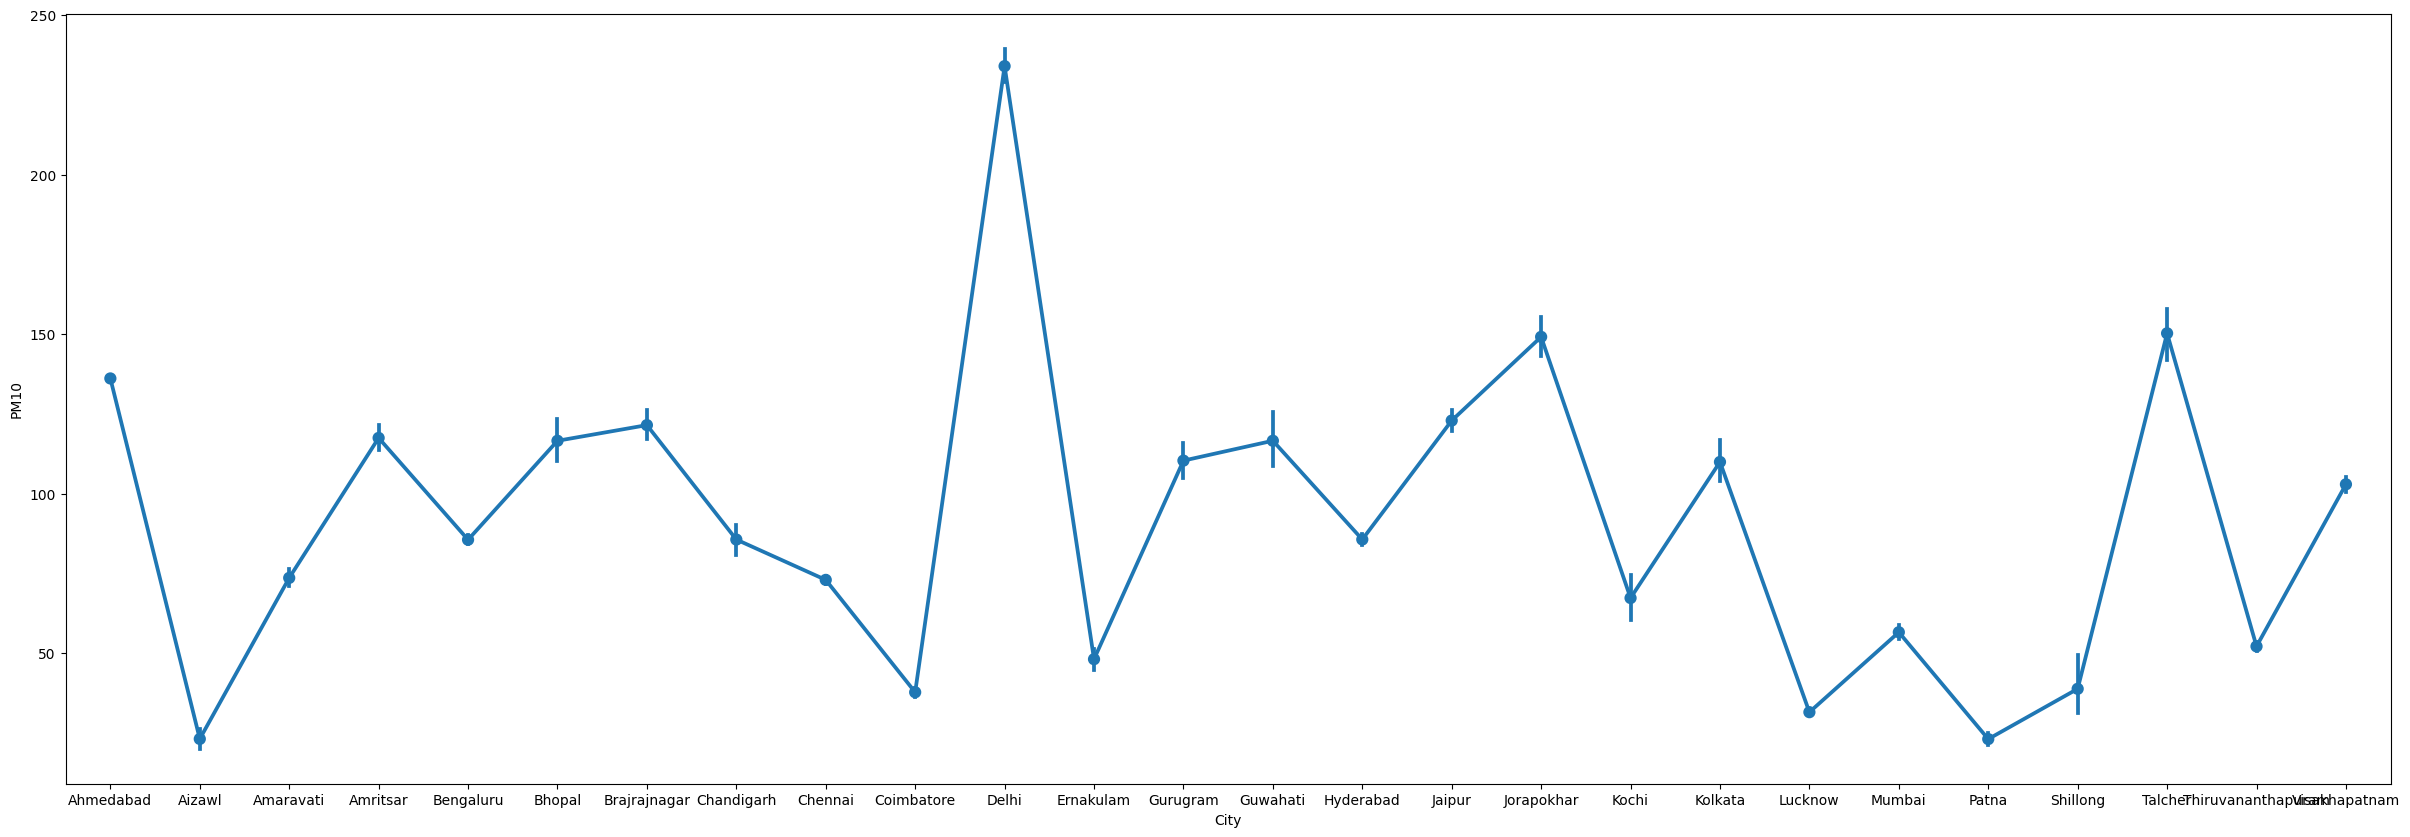

In [ ]:
# Importing the Seaborn library and aliasing it as sns.
import seaborn as sns

# Creating a new figure with a specific size (30 inches in width and 10 inches in height).
plt.figure(figsize=(30, 10))

# Creating a point plot using Seaborn.
# The 'City' column is represented on the x-axis, and the 'PM10' column is represented on the y-axis.
# The data for the plot is taken from the 'air_quality_data' DataFrame.
sns.pointplot(x='City', y='PM10', data=data);


In [ ]:
#  extrating data for Maximum and minimum NO of each city.
g = data.groupby(['City']).NO.agg([min, max]).reset_index()
g

,City,min,max
0,Ahmedabad,0.06,175.81
1,Aizawl,2.90,20.36
2,Amaravati,0.25,43.76
3,Amritsar,0.40,103.44
4,Bengaluru,0.46,95.19
5,Bhopal,0.59,30.94
6,Brajrajnagar,0.02,390.68
7,Chandigarh,0.44,70.94
8,Chennai,1.76,59.44
9,Coimbatore,0.19,87.90


In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor


In [ ]:
# Dropping irrelevent columns.
data = data.drop(['Date', 'Xylene'], axis=1)

In [ ]:
# Checked shape of data.
data.shape

(29531, 14)

In [ ]:
# Checked the info about data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   PM2.5        29531 non-null  float64
 2   PM10         29531 non-null  float64
 3   NO           29531 non-null  float64
 4   NO2          29531 non-null  float64
 5   NOx          29531 non-null  float64
 6   NH3          29531 non-null  float64
 7   CO           29531 non-null  float64
 8   SO2          29531 non-null  float64
 9   O3           29531 non-null  float64
 10  Benzene      29531 non-null  float64
 11  Toluene      29531 non-null  float64
 12  AQI          29531 non-null  float64
 13  Air_quality  29531 non-null  object 
dtypes: float64(12), object(2)
memory usage: 3.2+ MB


In [ ]:
# showing the data present in Air Quality column.
data['Air_quality'].value_counts()

Satisfactory    10468
Moderate         9680
Poor             3136
Very Poor        3018
Good             1817
Severe           1412
Name: Air_quality, dtype: int64

In [ ]:
# Creating a boolean mask for rows where the 'City' is 'Bengaluru'.
bengalore_data_mask = data['City'] == 'Bengaluru'

# Filtering the original DataFrame to create a new DataFrame containing only 'Bengaluru' data.
bengalore_data = data[bengalore_data_mask]


Banglore City


In [ ]:
bengalore_data.shape # check shape of data.

(2009, 14)

In [ ]:
bengalore_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air_quality
4294,Bengaluru,57.67,100.99,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,78.0,Satisfactory
4295,Bengaluru,57.67,100.99,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,78.0,Satisfactory
4296,Bengaluru,57.67,100.99,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,78.0,Satisfactory
4297,Bengaluru,57.67,100.99,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,78.0,Satisfactory
4298,Bengaluru,57.67,100.99,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,78.0,Satisfactory


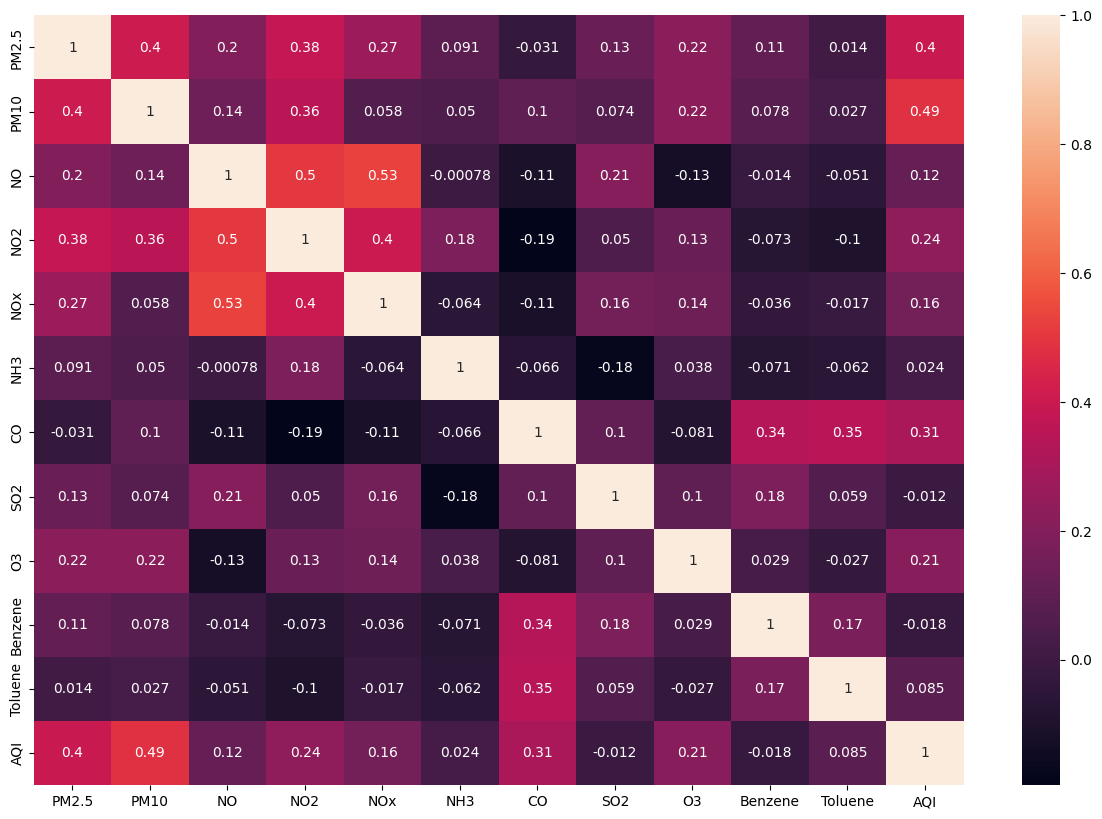

In [ ]:
# Creating a new figure with a specific size (15 inches in width and 10 inches in height).
plt.figure(figsize=(15, 10))

# Creating a heatmap of the correlation matrix for the 'Bengalore' data.
# The 'corr()' method calculates the correlation between different columns in the DataFrame.
# The 'annot=True' parameter adds the correlation values to the heatmap.
sns.heatmap(bengalore_data.corr(), annot=True)

# Displaying the heatmap.
plt.show();


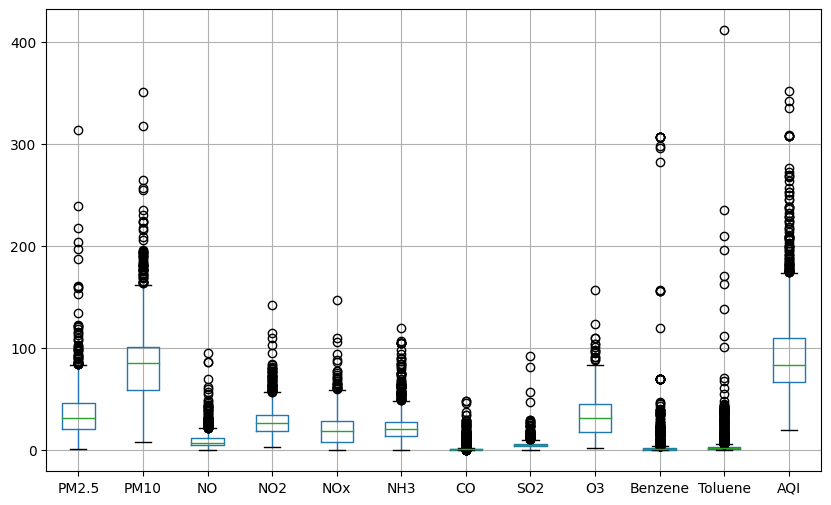

In [ ]:
# Creating a new figure with a specific size (10 inches in width and 6 inches in height).
plt.figure(figsize=(10, 6))

# Creating a boxplot to visualize the distribution and identify outliers in the 'Bengalore' data.
bengalore_data.boxplot()

# Displaying the boxplot.
plt.show();


In [ ]:
# Calculating the first quartile (Qt_1) and third quartile (Qt_3) for the 'NO' and 'PM2.5' columns in the 'Bengalore' data.
Qt_1 = bengalore_data[['NO', 'PM2.5']].quantile(0.25)
Qt_3 = bengalore_data[['NO', 'PM2.5']].quantile(0.75)

# Calculating the Interquartile Range (IQR) for the 'NO' and 'PM2.5' columns.
i_q_r = Qt_3 - Qt_1

# Calculating the lower and upper bounds for identifying outliers using the IQR method.
low_bound = Qt_1 - (1.5 * i_q_r)
up_bound = Qt_3 + (1.5 * i_q_r)

# Removing outliers from the 'NO' column within the specified bounds.
bengalore_data = bengalore_data[(bengalore_data['NO'] >= low_bound['NO']) & (bengalore_data['NO'] <= up_bound['NO'])]

# Removing outliers from the 'PM2.5' column within the specified bounds.
bengalore_data = bengalore_data[(bengalore_data['PM2.5'] >= low_bound['PM2.5']) & (bengalore_data['PM2.5'] <= up_bound['PM2.5'])]


In [ ]:
bengalore_data.shape

(1873, 14)

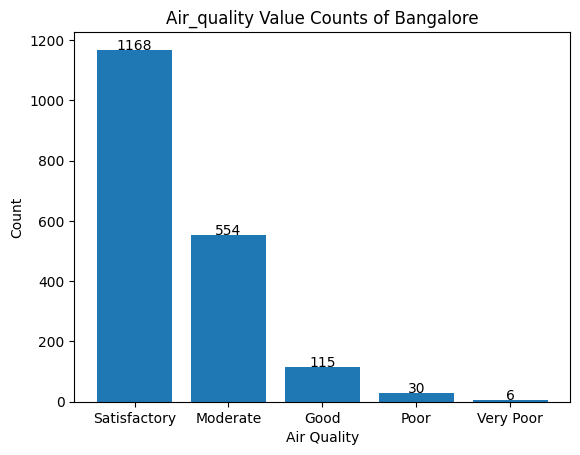

In [ ]:
# Calculating the value counts of the 'Air_quality' column in the 'Bengalore' data.
value_counts = bengalore_data['Air_quality'].value_counts()

# Creating a bar plot to visualize the distribution of Air Quality categories in Bengalore.
plt.bar(value_counts.index, value_counts.values)

# Adding a title to the plot indicating the variable being visualized and the city.
plt.title(f"{'Air_quality'} Value Counts of Bangalore")

# Adding labels to the x and y axes.
plt.xlabel('Air Quality')
plt.ylabel("Count")

# Adding text annotations to each bar with the count of occurrences.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')

# Displaying the bar plot.
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object.
lbl_enc = LabelEncoder()

# Applying label encoding to the 'Air_quality' column in the 'Bengalore' data.
bengalore_data['Air_quality'] = lbl_enc.fit_transform(bengalore_data['Air_quality'])


In [ ]:
bengalore_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air_quality
4294,Bengaluru,57.67,100.99,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,78.0,3
4295,Bengaluru,57.67,100.99,6.05,19.73,14.14,23.74,1.35,3.97,22.77,0.65,5.31,78.0,3
4296,Bengaluru,57.67,100.99,11.91,19.88,20.72,4.32,17.40,13.61,12.03,0.53,19.25,78.0,3
4297,Bengaluru,57.67,100.99,7.45,21.61,16.88,0.87,5.05,6.52,17.70,0.55,7.47,78.0,3
4298,Bengaluru,57.67,100.99,9.52,22.17,21.76,31.38,1.83,4.71,12.72,0.40,4.36,78.0,3


In [ ]:
X = bengalore_data.drop(['AQI', 'City'], axis=1)
Y = bengalore_data['AQI']


Feature Importance Using Extra Tree Classifier



In [ ]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 12)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

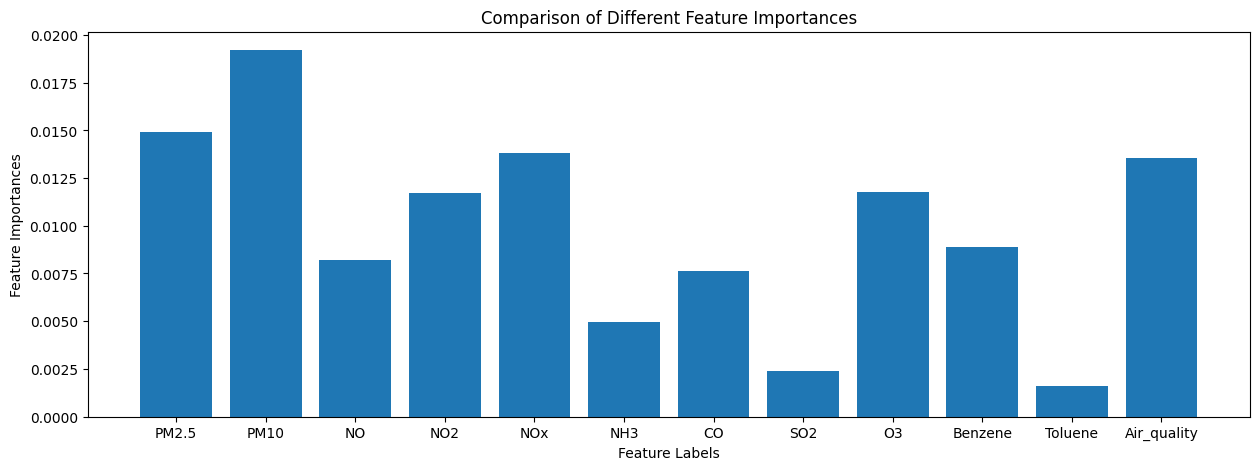

In [ ]:
# Creating a new figure with a specific size (15 inches in width and 5 inches in height).
plt.figure(figsize=(15, 5))

# Creating a bar graph to compare feature importances.
# X.columns represents the feature labels, and feature_importance_normalized represents the corresponding importances.
plt.bar(X.columns, feature_importance_normalized)

# Adding labels to the x and y axes.
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')

# Adding a title to the plot.
plt.title('Comparison of Different Feature Importances')

# Displaying the bar graph.
plt.show()


In [ ]:
# Dropping the feature with least importance.
bengalore_data = bengalore_data.drop(['Toluene'], axis=1)

In [ ]:
X = bengalore_data.drop(['Air_quality', 'City'], axis=1)
Y = bengalore_data['Air_quality']

In [ ]:
# Spliting Dataset into training and testing.
X_Train, X_Test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
# Applying Random Forest classifier.
rfm = RandomForestClassifier(max_depth=5, n_estimators=5)
rfm.fit(X_Train, Y_Train)

# Making Prediction.
y_pred_ben = rfm.predict(X_Test)

# Calculating metrics for evaluating the model's performance on the test data.
acc_ben = accuracy_score(Y_test, y_pred_ben)
f1_ben = f1_score(Y_test, y_pred_ben, average='weighted')
recall_ben = recall_score(Y_test, y_pred_ben, average= 'weighted')
precision_ben = precision_score(Y_test, y_pred_ben, average= 'weighted')

# Displaying the evaluation metrics.
print("Accuracy:", acc_ben)
print('Precision:', precision_ben)
print('Recall:', recall_ben)
print('F1 SCore:', f1_ben)


Accuracy: 0.936
Precision: 0.9308161413214918
Recall: 0.936
F1 SCore: 0.93143475998304


In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,y_pred_ben)


In [ ]:
matrix

array([[ 18,   0,   0,   4,   0],
       [  0, 107,   0,  12,   0],
       [  0,   4,   1,   0,   0],
       [  0,   3,   0, 225,   0],
       [  0,   0,   1,   0,   0]])

<Axes: >

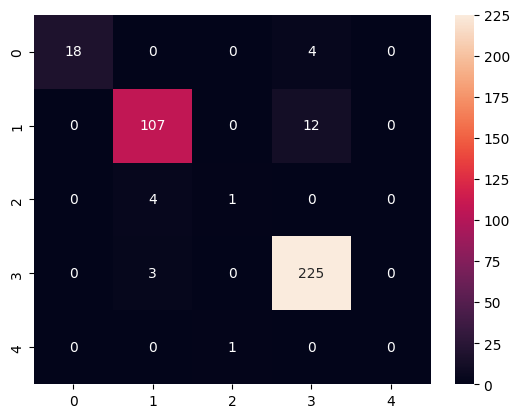

In [ ]:
sns.heatmap(matrix,annot=True,fmt='g')

Delhi


In [ ]:
# Creating a boolean mask for rows where the 'City' is 'Delhi'.
delhi_data_mask = data['City'] == 'Delhi'

# Filtering the original DataFrame to create a new DataFrame containing only 'Delhi' data.
delhi_data = data[delhi_data_mask]


In [ ]:
delhi_data.shape

(2009, 14)

In [ ]:
delhi_data.head

<bound method NDFrame.head of         City   PM2.5    PM10     NO    NO2     NOx     NH3     CO    SO2  \
10229  Delhi  313.22  607.98  69.16  36.39  110.59   33.85  15.20   9.25   
10230  Delhi  186.18  269.55  62.09  32.87   88.14   31.83   9.54   6.65   
10231  Delhi   87.18  131.90  25.73  30.31   47.95   69.55  10.61   2.65   
10232  Delhi  151.84  241.84  25.01  36.91   48.62  130.36  11.54   4.63   
10233  Delhi  146.60  219.13  14.01  34.92   38.25  122.88   9.20   3.33   
...      ...     ...     ...    ...    ...     ...     ...    ...    ...   
12233  Delhi   39.80  155.94  10.88  21.46   22.47   31.43   0.87  10.38   
12234  Delhi   59.52  308.65  12.67  21.60   23.86   29.27   0.94  10.70   
12235  Delhi   44.86  184.12  10.50  21.57   21.94   27.97   0.88  11.58   
12236  Delhi   39.80   91.98   5.99  17.96   15.44   28.48   0.84  10.51   
12237  Delhi   54.01  128.66   6.33  21.05   16.81   29.06   0.97  11.15   

          O3  Benzene  Toluene    AQI Air_quality  
10229

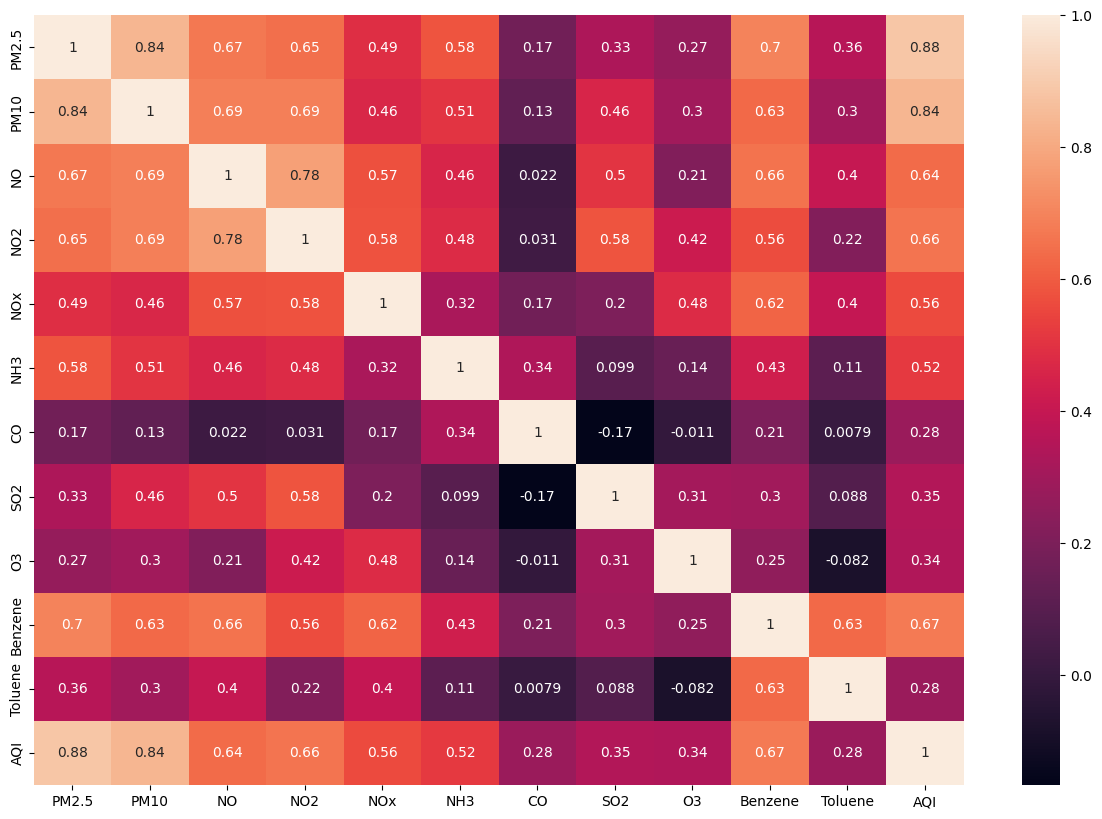

In [ ]:
# Creating a new figure with a specific size (15 inches in width and 10 inches in height).
plt.figure(figsize=(15, 10))

# Creating a heatmap of the correlation matrix for the 'Bengalore' data.
# The 'corr()' method calculates the correlation between different columns in the DataFrame.
# The 'annot=True' parameter adds the correlation values to the heatmap.
sns.heatmap(delhi_data.corr(), annot=True)

# Displaying the heatmap.
plt.show();


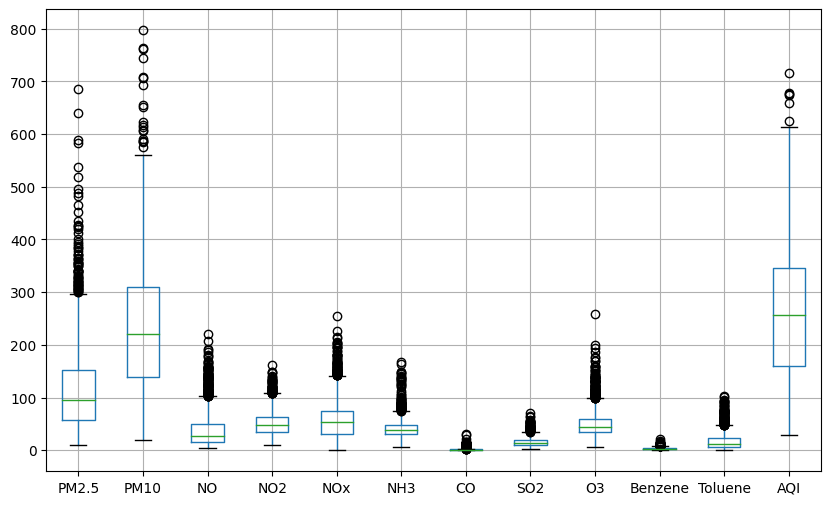

In [ ]:
# Creating a new figure with a specific size (10 inches in width and 6 inches in height).
plt.figure(figsize=(10, 6))

# Creating a boxplot to visualize the distribution and identify outliers in the 'Delhi' data.
delhi_data.boxplot()

# Displaying the boxplot.
plt.show();


In [ ]:
# Calculating the first quartile (Qt_1) and third quartile (Qt_3) for the 'NO' and 'PM2.5' columns in the 'Delhi' data.
Qt_1 = delhi_data[['NO', 'PM2.5']].quantile(0.25)
Qt_3 = delhi_data[['NO', 'PM2.5']].quantile(0.75)

# Calculating the Interquartile Range (IQR) for the 'NO' and 'PM2.5' columns.
i_q_r = Qt_3 - Qt_1

# Calculating the lower and upper bounds for identifying outliers using the IQR method.
low_bound = Qt_1 - (1.5 * i_q_r)
up_bound = Qt_3 + (1.5 * i_q_r)

# Removing outliers from the 'NO' column within the specified bounds.
delhi_data = delhi_data[(delhi_data['NO'] >= low_bound['NO']) & (delhi_data['NO'] <= up_bound['NO'])]

# Removing outliers from the 'PM2.5' column within the specified bounds.
delhi_data = delhi_data[(delhi_data['PM2.5'] >= low_bound['PM2.5']) & (delhi_data['PM2.5'] <= up_bound['PM2.5'])]


In [ ]:
delhi_data.shape

(1836, 14)

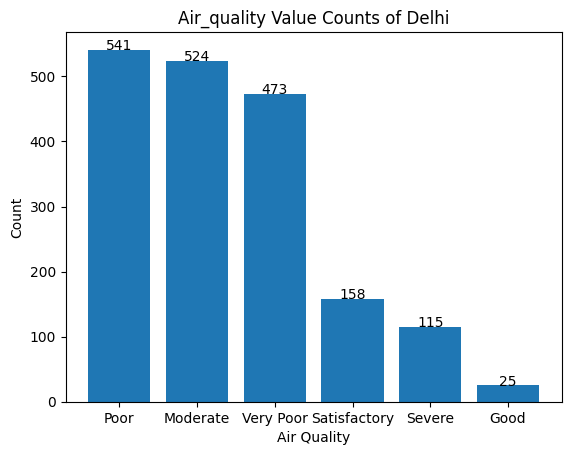

In [ ]:
# Calculating the value counts of the 'Air_quality' column in the 'Delhi' data.
value_counts = delhi_data['Air_quality'].value_counts()

# Creating a bar plot to visualize the distribution of Air Quality categories in Delhi.
plt.bar(value_counts.index, value_counts.values)

# Adding a title to the plot indicating the variable being visualized and the city.
plt.title(f"{'Air_quality'} Value Counts of Delhi")

# Adding labels to the x and y axes.
plt.xlabel('Air Quality')
plt.ylabel("Count")

# Adding text annotations to each bar with the count of occurrences.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')

# Displaying the bar plot.
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object.
lbl_enc = LabelEncoder()

# Applying label encoding to the 'Air_quality' column in the 'Delhi' data.
delhi_data['Air_quality'] = lbl_enc.fit_transform(delhi_data['Air_quality'])


In [ ]:
delhi_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air_quality
10230,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,454.0,4
10231,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,143.0,1
10232,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,319.0,5
10233,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,325.0,5
10234,Delhi,149.58,252.10,17.21,37.84,42.46,134.97,9.44,3.66,26.83,3.63,7.35,318.0,5


In [ ]:
X = delhi_data.drop(['AQI', 'City'], axis=1)
Y = delhi_data['AQI']

Feature Importance Using Extra Tree Classifier

In [ ]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 12)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

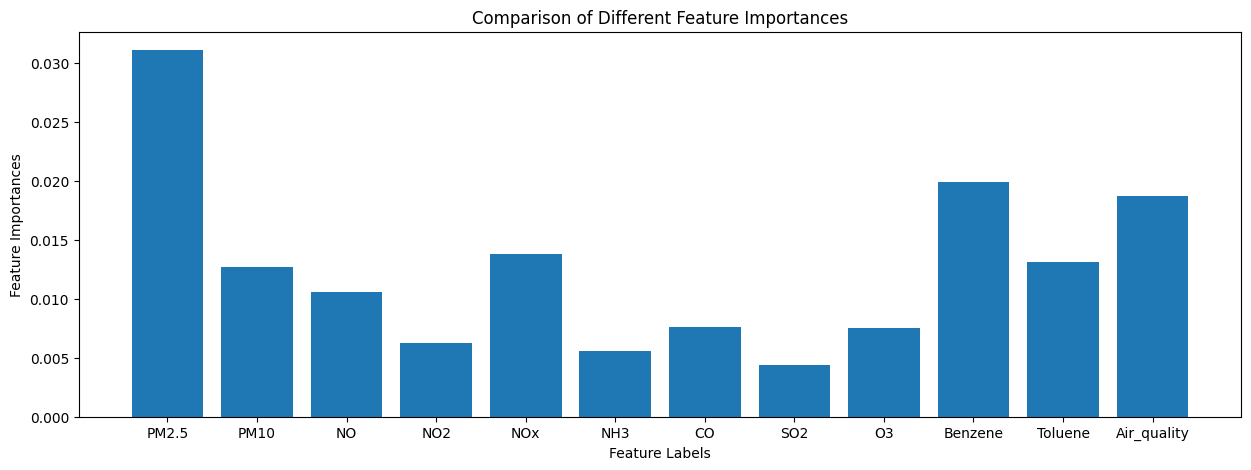

In [ ]:
# Creating a new figure with a specific size (15 inches in width and 5 inches in height).
plt.figure(figsize=(15, 5))

# Creating a bar graph to compare feature importances.
# X.columns represents the feature labels, and feature_importance_normalized represents the corresponding importances.
plt.bar(X.columns, feature_importance_normalized)

# Adding labels to the x and y axes.
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')

# Adding a title to the plot.
plt.title('Comparison of Different Feature Importances')

# Displaying the bar graph.
plt.show()


In [ ]:
delhi_data = delhi_data.drop(['CO'], axis=1)


In [ ]:
X = delhi_data.drop(['Air_quality', 'City'], axis=1)
Y = delhi_data['Air_quality']

In [ ]:
# Spliting Dataset into training and testing.
X_Train, X_Test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [ ]:
# Applying Random Forest classifier.
rfm = RandomForestClassifier(max_depth=5, n_estimators=5)
rfm.fit(X_Train, Y_Train)

# Making Prediction.
y_pred_delhi = rfm.predict(X_Test)

# Calculating metrics for evaluating the model's performance on the test data.
acc_delhi = accuracy_score(Y_test, y_pred_delhi)
f1_delhi = f1_score(Y_test, y_pred_delhi, average='weighted')
recall_delhi = recall_score(Y_test, y_pred_delhi, average= 'weighted')
precision_delhi = precision_score(Y_test, y_pred_delhi, average= 'weighted')

# Displaying the evaluation metrics.
print("Accuracy:", acc_delhi)
print('Precision:', precision_delhi)
print('Recall:', recall_delhi)
print('F1 SCore:', f1_delhi)


Accuracy: 0.9130434782608695
Precision: 0.9165878480745699
Recall: 0.9130434782608695
F1 SCore: 0.9127724555234514


In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,y_pred_delhi)


In [ ]:
matrix

array([[  4,   0,   0,   1,   0,   0],
       [  0,  98,   1,   1,   0,   0],
       [  0,  10, 100,   0,   0,   4],
       [  0,   4,   0,  28,   0,   0],
       [  0,   0,   0,   0,  12,   3],
       [  0,   2,   6,   0,   0,  94]])

<Axes: >

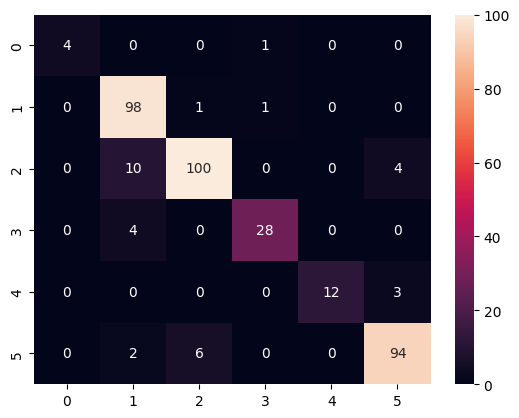

In [ ]:
sns.heatmap(matrix,annot=True,fmt='g')

Hyderabad City

In [ ]:
# Creating a boolean mask for rows where the 'City' is 'Hyderabad'.
h_data_mask = data['City'] == 'Hyderabad'

# Filtering the original DataFrame to create a new DataFrame containing only 'Hyderabad' data.
h_data = data[h_data_mask]


In [ ]:
h_data.shape

(2006, 14)

In [ ]:
h_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air_quality
14581,Hyderabad,40.0,53.0,3.70,17.19,20.89,5.02,0.30,2.58,30.34,0.41,6.15,36.0,Good
14582,Hyderabad,40.0,53.0,3.61,9.69,13.30,5.02,0.23,5.19,31.28,0.39,7.22,36.0,Good
14583,Hyderabad,40.0,53.0,4.21,22.02,26.23,5.02,0.31,9.09,28.56,0.52,5.14,36.0,Good
14584,Hyderabad,40.0,53.0,26.08,40.08,66.15,5.02,0.53,9.03,31.08,1.92,16.35,36.0,Good
14585,Hyderabad,40.0,53.0,10.31,33.02,43.33,5.02,0.44,8.47,35.72,1.89,14.27,36.0,Good


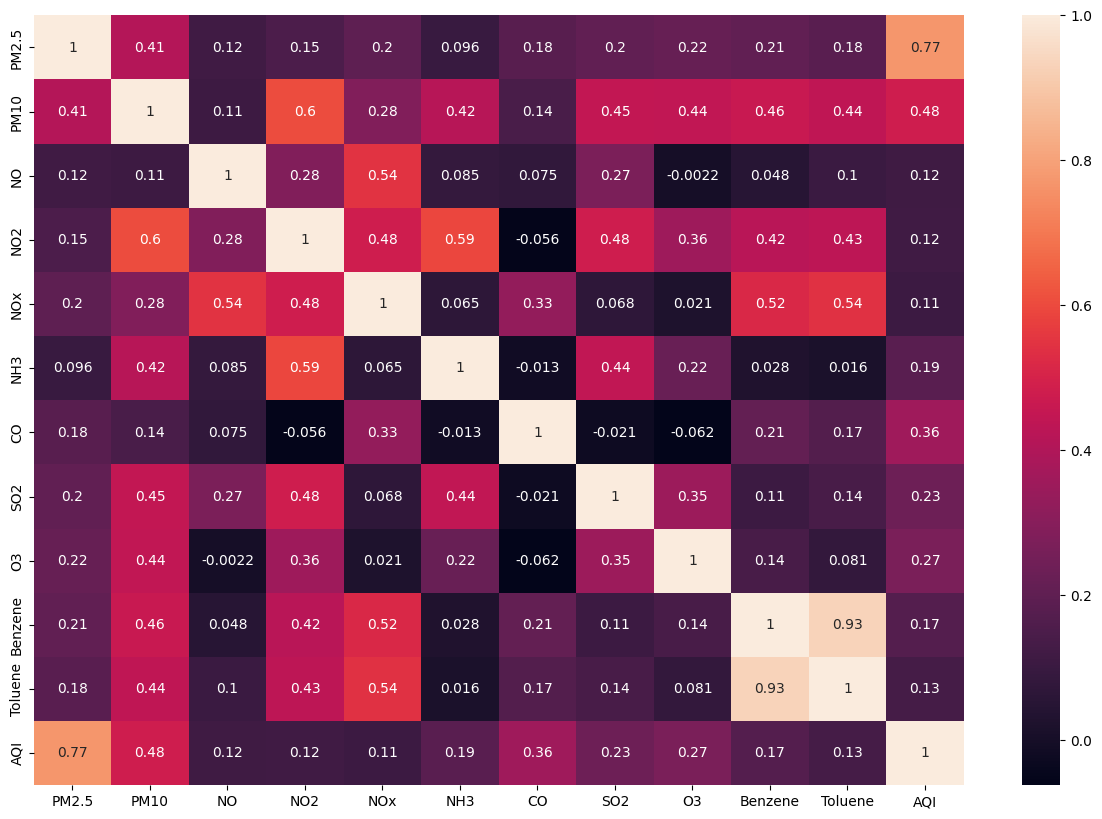

In [ ]:
# Creating a new figure with a specific size (15 inches in width and 10 inches in height).
plt.figure(figsize=(15, 10))

# Creating a heatmap of the correlation matrix for the 'Hyderabad' data.
# The 'corr()' method calculates the correlation between different columns in the DataFrame.
# The 'annot=True' parameter adds the correlation values to the heatmap.
sns.heatmap(h_data.corr(), annot=True)

# Displaying the heatmap.
plt.show();


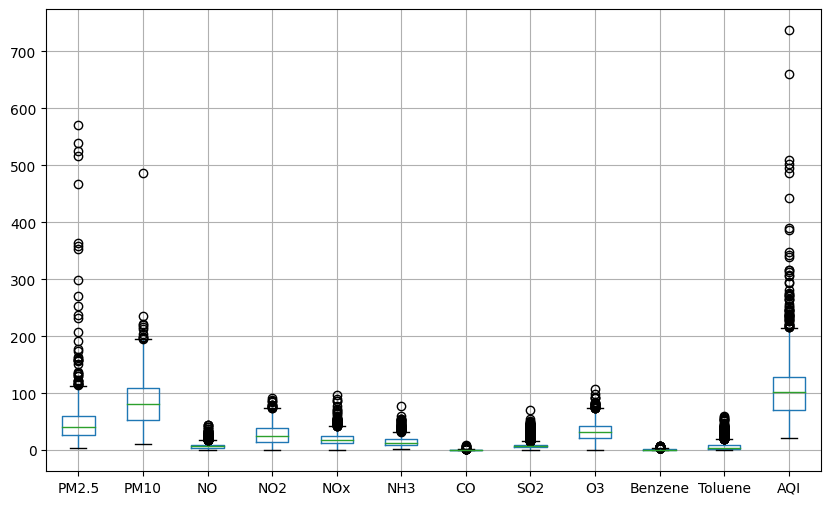

In [ ]:
# Creating a new figure with a specific size (10 inches in width and 6 inches in height).
plt.figure(figsize=(10, 6))

# Creating a boxplot to visualize the distribution and identify outliers in the 'Bengalore' data.
h_data.boxplot()

# Displaying the boxplot.
plt.show();


In [ ]:
# Calculating the first quartile (Qt_1) and third quartile (Qt_3) for the 'NO' and 'PM2.5' columns in the 'Bengalore' data.
Qt_1 = h_data[['NO', 'PM2.5']].quantile(0.25)
Qt_3 = h_data[['NO', 'PM2.5']].quantile(0.75)

# Calculating the Interquartile Range (IQR) for the 'NO' and 'PM2.5' columns.
i_q_r = Qt_3 - Qt_1

# Calculating the lower and upper bounds for identifying outliers using the IQR method.
low_bound = Qt_1 - (1.5 * i_q_r)
up_bound = Qt_3 + (1.5 * i_q_r)

# Removing outliers from the 'NO' column within the specified bounds.
h_data = h_data[(h_data['NO'] >= low_bound['NO']) & (h_data['NO'] <= up_bound['NO'])]

# Removing outliers from the 'PM2.5' column within the specified bounds.
h_data = h_data[(h_data['PM2.5'] >= low_bound['PM2.5']) & (h_data['PM2.5'] <= up_bound['PM2.5'])]


In [ ]:
h_data.shape

(1895, 14)

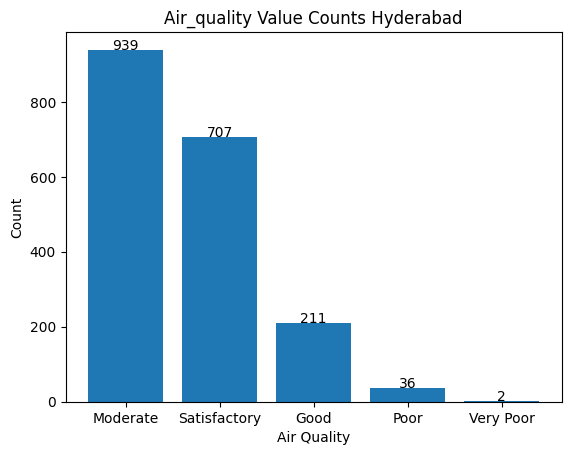

In [ ]:
# Calculating the value counts of the 'Air_quality' column in the 'Hyderabad' data.
value_counts = h_data['Air_quality'].value_counts()

# Creating a bar plot to visualize the distribution of Air Quality categories in Hyderabad.
plt.bar(value_counts.index, value_counts.values)

# Adding a title to the plot indicating the variable being visualized and the city.
plt.title(f"{'Air_quality'} Value Counts Hyderabad")

# Adding labels to the x and y axes.
plt.xlabel('Air Quality')
plt.ylabel("Count")

# Adding text annotations to each bar with the count of occurrences.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), color='black', ha='center')

# Displaying the bar plot.
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object.
lbl_enc = LabelEncoder()

# Applying label encoding to the 'Air_quality' column in the 'Hyderabad' data.
h_data['Air_quality'] = lbl_enc.fit_transform(h_data['Air_quality'])


In [ ]:
h_data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Air_quality
14581,Hyderabad,40.0,53.0,3.70,17.19,20.89,5.02,0.30,2.58,30.34,0.41,6.15,36.0,0
14582,Hyderabad,40.0,53.0,3.61,9.69,13.30,5.02,0.23,5.19,31.28,0.39,7.22,36.0,0
14583,Hyderabad,40.0,53.0,4.21,22.02,26.23,5.02,0.31,9.09,28.56,0.52,5.14,36.0,0
14585,Hyderabad,40.0,53.0,10.31,33.02,43.33,5.02,0.44,8.47,35.72,1.89,14.27,36.0,0
14586,Hyderabad,40.0,53.0,8.79,31.60,40.39,5.02,0.39,8.92,34.77,0.77,12.47,36.0,0


In [ ]:
X = h_data.drop(['AQI', 'City'], axis=1)
Y = h_data['AQI']

In [ ]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 12)

# Training the model
extra_tree_forest.fit(X, Y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

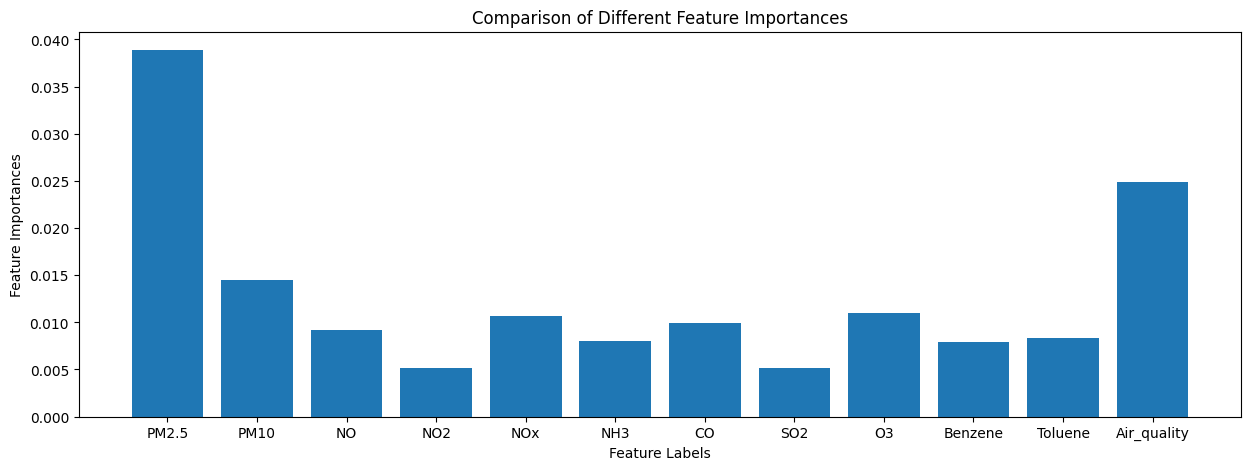

In [ ]:
# Creating a new figure with a specific size (15 inches in width and 5 inches in height).
plt.figure(figsize=(15, 5))

# Creating a bar graph to compare feature importances.
# X.columns represents the feature labels, and feature_importance_normalized represents the corresponding importances.
plt.bar(X.columns, feature_importance_normalized)

# Adding labels to the x and y axes.
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')

# Adding a title to the plot.
plt.title('Comparison of Different Feature Importances')

# Displaying the bar graph.
plt.show()


In [ ]:
# Dropping the feature with least importance.
h_data = h_data.drop(['NH3'], axis=1)

In [ ]:
X = h_data.drop(['Air_quality', 'City'], axis=1)
Y = h_data['Air_quality']

In [ ]:
# Spliting Dataset into training and testing.
X_Train, X_Test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [ ]:
# Applying Random Forest classifier.
rfm = RandomForestClassifier(max_depth=5, n_estimators=5)
rfm.fit(X_Train, Y_Train)

# Making Prediction.
y_pred_h = rfm.predict(X_Test)

# Calculating metrics for evaluating the model's performance on the test data.
acc_h = accuracy_score(Y_test, y_pred_h)
f1_h = f1_score(Y_test, y_pred_h, average='weighted')
recall_h = recall_score(Y_test, y_pred_h, average= 'weighted')
precision_h = precision_score(Y_test, y_pred_h, average= 'weighted')

# Displaying the evaluation metrics.
print("Accuracy:", acc_h)
print('Precision:', precision_h)
print('Recall:', recall_h)
print('F1 SCore:', f1_h)


Accuracy: 0.9868073878627969
Precision: 0.9835059854166396
Recall: 0.9868073878627969
F1 SCore: 0.9850788760606201


In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,y_pred_h)



In [ ]:
matrix

array([[ 62,   0,   0,   1,   0],
       [  0, 172,   0,   0,   0],
       [  0,   3,   5,   0,   0],
       [  0,   0,   0, 135,   0],
       [  0,   0,   1,   0,   0]])

<Axes: >

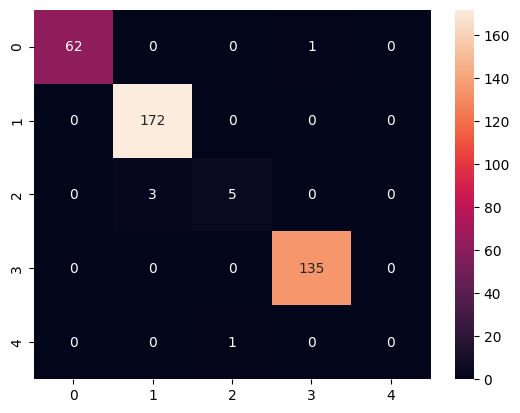

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,y_pred_h)

# plt.figure(figsize=(6,10))
sns.heatmap(matrix,annot=True,fmt='g')